In [251]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras import Model
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [252]:
df = pd.read_csv("E:\\datasets\\anemia.csv")

In [253]:
features = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
df['data'] = df[features].values.tolist()

df['target'] = df['Anaemic']
df = df[['data', 'target']]

df['target'] = LabelEncoder().fit_transform(df['target'])  # Yes = 1, No = 0

df['data'] = df['data'].apply(lambda row: [1 if str(feature).strip() == 'M' else 0 if str(feature).strip() == 'F' else feature for feature in row])


In [254]:
X = np.array(df['data'].tolist())
y = np.array(df['target'].tolist())

num_features =X.shape[1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [256]:
num_features = X.shape[1]
num_classes = len(np.unique(y))

In [257]:
input_layer = Input(shape=(num_features, ))

neuron = Dense(1, activation='relu')(input_layer)

nonlinear_neuron = Model(inputs=[input_layer], outputs=[neuron])
nonlinear_neuron.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [272]:
nonlinear_neuron.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_split=0.3, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8400 - loss: 0.1320 - val_accuracy: 0.9091 - val_loss: 0.1009
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8400 - loss: 0.1317 - val_accuracy: 0.9091 - val_loss: 0.1009
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8400 - loss: 0.1314 - val_accuracy: 0.9091 - val_loss: 0.1009
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8400 - loss: 0.1311 - val_accuracy: 0.9091 - val_loss: 0.1009
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8400 - loss: 0.1308 - val_accuracy: 0.9091 - val_loss: 0.1009
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8600 - loss: 0.1305 - val_accuracy: 0.9091 - val_loss: 0.1009
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8600 - loss: 0.1302 - val_accuracy: 0.9091 - val_loss: 0.1008
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8600 - loss: 0.1299 - val_accuracy: 0.9091 - val_loss

In [273]:
test_loss, test_accuracy = nonlinear_neuron.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9375 - loss: 0.0847
Test Loss: 0.08471743762493134
Test Accuracy: 0.9375


In [274]:
y_pred_prob = nonlinear_neuron.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

conf_matrix = confusion_matrix(y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


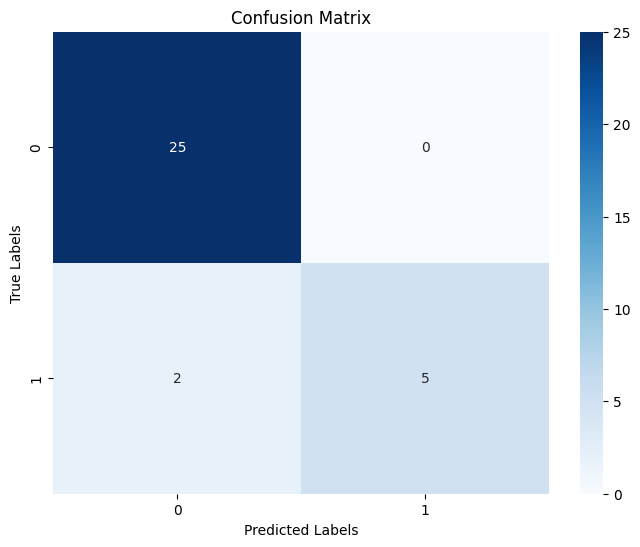

In [275]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [276]:
class_report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      1.00      0.96        25
     Class 1       1.00      0.71      0.83         7

    accuracy                           0.94        32
   macro avg       0.96      0.86      0.90        32
weighted avg       0.94      0.94      0.93        32



In [277]:
y_true=y_test

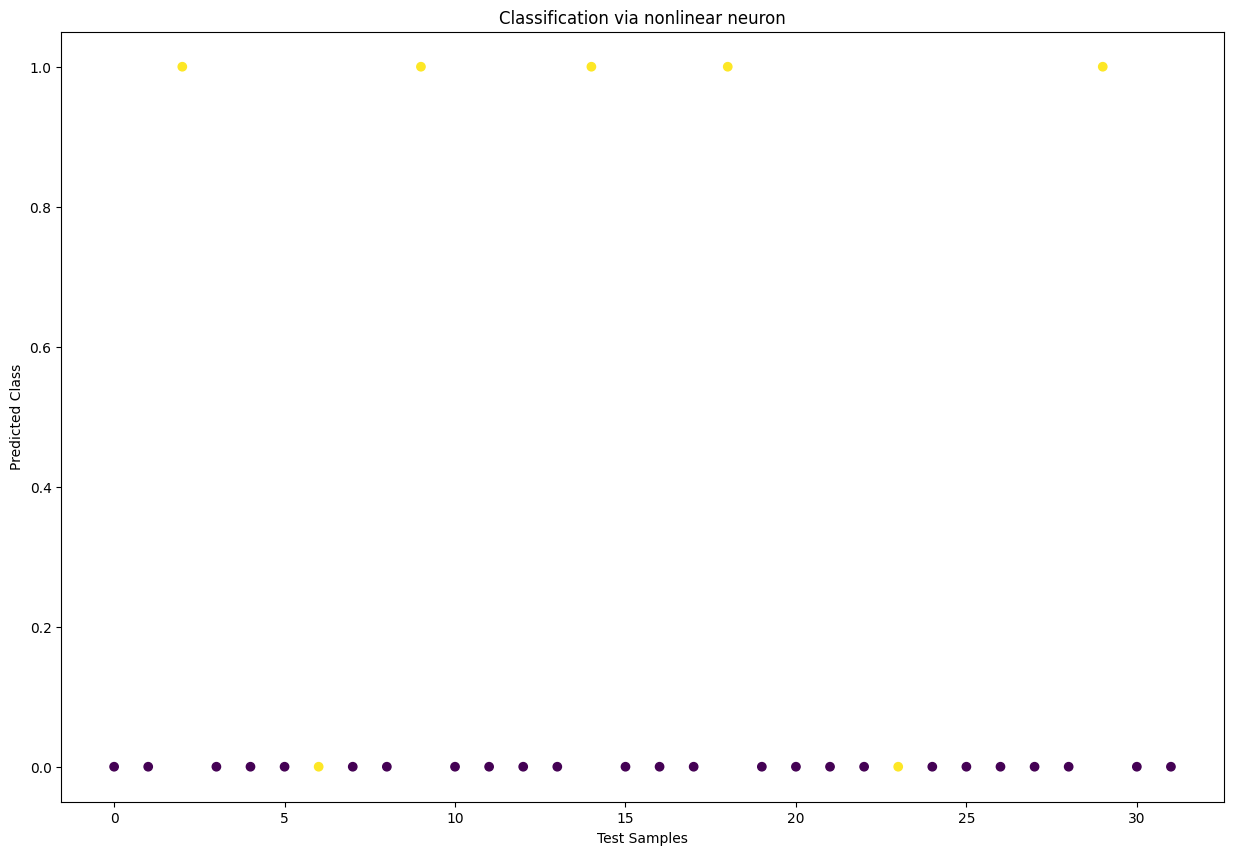

In [278]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(range(len(y_pred)), y_pred, marker='o', c=y_true, cmap='viridis', label='Predicted Class')

plt.xlabel('Test Samples')
plt.ylabel('Predicted Class')
plt.title('Classification via nonlinear neuron')
plt.show()